# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Big Data Real-Time Analytics com Python e Spark</font>

# <font color='blue'>Capítulo 4</font>

## Exercícios 

Hora de praticar um pouco. Resolva as questões a seguir e consulte a documentação Python se necessário! 

A solução será apresentada no próximo capítulo.

In [95]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

matplotlib: 3.3.4
numpy     : 1.22.3
pandas    : 1.4.2



In [7]:
# O dataset contém registros de corridas de táxi
df = pd.read_csv('dados/dataframe.csv', parse_dates = ['Data'], usecols = list(range(0,6)))

In [8]:
df

,Data,Distancia,Tempo,Segundos,Minutos,Min_Por_Km
0,2015-08-02,1.70,NaN,NaN,NaN,NaN
1,2015-08-03,1.40,NaN,NaN,NaN,NaN
2,2015-08-04,2.10,NaN,NaN,NaN,NaN
3,2015-08-06,2.38,NaN,NaN,NaN,NaN
4,2015-08-07,2.30,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
76,2015-12-24,3.05,0:25:08,1508.0,25.133333,8.240437
77,2015-12-25,14.80,2:20:00,8400.0,140.000000,9.459459
78,2015-12-26,5.20,NaN,NaN,NaN,NaN
79,2015-12-30,3.15,0:22:10,1330.0,22.166667,7.037037


In [9]:
df.dtypes

Data          datetime64[ns]
Distancia            float64
Tempo                 object
Segundos             float64
Minutos              float64
Min_Por_Km           float64
dtype: object

In [10]:
df.sort_index(inplace = True)
df.sample(10)

,Data,Distancia,Tempo,Segundos,Minutos,Min_Por_Km
10,2015-08-13,2.35,0:17:25,1045.0,17.416667,7.411348
44,2015-10-04,4.08,0:33:00,1980.0,33.000000,8.088235
65,2015-11-28,3.00,NaN,NaN,NaN,NaN
54,2015-11-03,5.30,0:39:26,2366.0,39.433333,7.440252
38,2015-09-21,4.03,0:30:22,1822.0,30.366667,7.535153
67,2015-12-12,1.37,0:09:15,555.0,9.250000,6.751825
68,2015-12-13,5.30,0:43:36,2616.0,43.600000,8.226415
46,2015-10-14,1.37,0:09:05,545.0,9.083333,6.630170
73,2015-12-20,14.80,2:15:00,8100.0,135.000000,9.121622
40,2015-09-28,1.50,0:11:18,678.0,11.300000,7.533333


In [15]:
# Exercício 1 - Qual o valor máximo da coluna Minutos?
val_max = df['Minutos'].max(skipna = True)
val_max

260.71666666666664

In [96]:
# Exercício 2 - Qual o valor mínimo de distância acima de 2.0?
%timeit df.where(df['Distancia'] > 2.0).min(skipna=True)['Distancia']

20 ms ± 966 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [97]:
%timeit df.Distancia[df.Distancia > 2.0].min()

207 µs ± 4.32 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


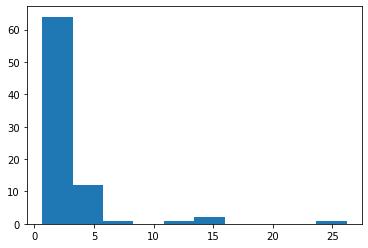

In [35]:
# Exercício 3 - Crie um plot com a frequência acumulada da coluna Distancia.
plt.hist(x = df['Distancia']);

<AxesSubplot:>

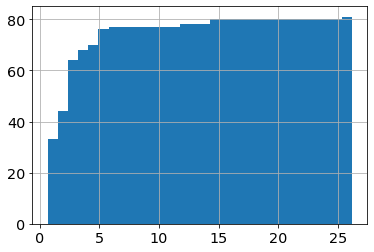

In [98]:
# Valor da correção abaixo.
df['Distancia'].hist(bins = 30, cumulative = True)

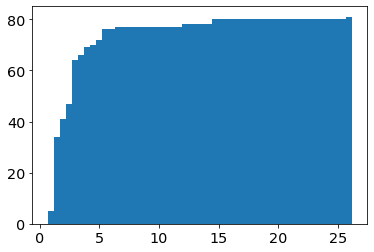

In [102]:
# Teste após correção.
plt.hist(x = df['Distancia'],bins = 50, cumulative = True);

In [40]:
# Exercício 4 - Qual o dia da semana no índice de posição zero?
dia_semana = df['Data'][0].strftime('%d') 
dia_semana

'02'

In [103]:
# Valor da Correção abaixo.
df.Data[0].strftime('%A')

'Sunday'

In [47]:
# Exercício 5 - Qual o dia da semana nos índices nas 5 primeiras posições?
[x.strftime('%d') for x in df['Data'][0:5]]

['02', '03', '04', '06', '07']

In [108]:
# Novo modelo após correção da atividade anterior (4)
[x.strftime('%A') for x in df.Data[0:5]]

['Sunday', 'Monday', 'Tuesday', 'Thursday', 'Friday']

In [109]:
# Correção
df.Data.map(lambda x: x.strftime('%A')).head(5)

0      Sunday
1      Monday
2     Tuesday
3    Thursday
4      Friday
Name: Data, dtype: object

In [110]:
# Exercício 6 - Extraia todos os dias da semana (em formato texto) e insira em uma nova coluna no dataframe df.
df['Dia'] = [x.strftime('%d') for x in df['Data']]
df.head(5)

,Data,Distancia,Segundos,Minutos,Min_Por_Km,Dia
0,2015-08-02,1.70,NaN,NaN,NaN,02
1,2015-08-03,1.40,NaN,NaN,NaN,03
2,2015-08-04,2.10,NaN,NaN,NaN,04
3,2015-08-06,2.38,NaN,NaN,NaN,06
4,2015-08-07,2.30,NaN,NaN,NaN,07


In [111]:
# Tentativa após compreender as resoluções anteriores
df['Dia'] = [x.strftime("%A") for x in df.Data]
df.head(5)

,Data,Distancia,Segundos,Minutos,Min_Por_Km,Dia
0,2015-08-02,1.70,NaN,NaN,NaN,Sunday
1,2015-08-03,1.40,NaN,NaN,NaN,Monday
2,2015-08-04,2.10,NaN,NaN,NaN,Tuesday
3,2015-08-06,2.38,NaN,NaN,NaN,Thursday
4,2015-08-07,2.30,NaN,NaN,NaN,Friday


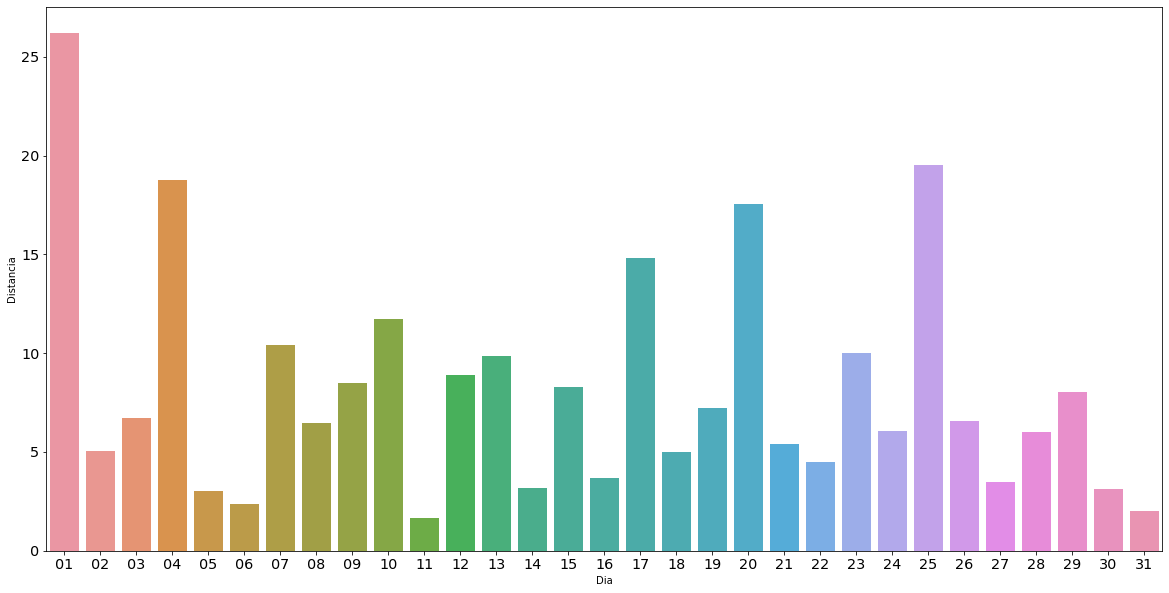

In [86]:
# Exercício 7 - Crie um gráfico de barras com o total da distância percorrida em cada dia da semana.
from matplotlib import rcParams
import seaborn as sns
rcParams['figure.figsize'] = 20, 10
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

df1 = df.groupby(['Dia'])['Distancia'].sum().reset_index()
sns.barplot(x = 'Dia', 
            y = 'Distancia', 
            data = df1);


In [87]:
# Exercício 8 - Delete a coluna Tempo do dataframe df.
del df['Tempo']
df

,Data,Distancia,Segundos,Minutos,Min_Por_Km,Dia
0,2015-08-02,1.70,NaN,NaN,NaN,02
1,2015-08-03,1.40,NaN,NaN,NaN,03
2,2015-08-04,2.10,NaN,NaN,NaN,04
3,2015-08-06,2.38,NaN,NaN,NaN,06
4,2015-08-07,2.30,NaN,NaN,NaN,07
...,...,...,...,...,...,...
76,2015-12-24,3.05,1508.0,25.133333,8.240437,24
77,2015-12-25,14.80,8400.0,140.000000,9.459459,25
78,2015-12-26,5.20,NaN,NaN,NaN,26
79,2015-12-30,3.15,1330.0,22.166667,7.037037,30


In [89]:
# Exercício 9 - Qual o total de corridas de taxi por dia da semana?
df.groupby(['Dia'])['Distancia'].count().reset_index()

,Dia,Distancia
0,01,1
1,02,3
2,03,2
3,04,6
4,05,1
5,06,1
6,07,4
7,08,2
8,09,3
9,10,5


In [90]:
# Exercício 10 - Qual a média para cada uma das colunas por dia da semana?
df.groupby(['Dia']).mean().reset_index()

,Dia,Distancia,Segundos,Minutos,Min_Por_Km
0,01,26.200000,15643.000000,260.716667,9.951018
1,02,1.690000,523.000000,8.716667,6.362530
2,03,3.350000,2366.000000,39.433333,7.440252
3,04,3.130000,1904.000000,31.733333,8.002078
4,05,3.050000,1430.000000,23.833333,7.814208
5,06,2.380000,NaN,NaN,NaN
6,07,2.597500,2945.000000,49.083333,8.718176
7,08,3.225000,1391.000000,23.183333,7.601093
8,09,2.826667,1428.000000,23.800000,7.971130
9,10,2.346000,871.750000,14.529167,7.187428


## FIM